/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


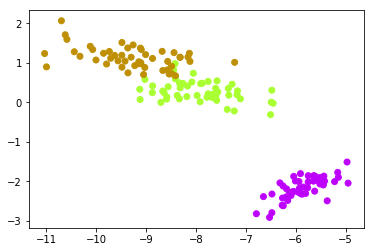

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class TF_PCA():

    def __init__(self,X,Y):
        self.dtype = tf.float32
        self.data = X
        self.target = Y
        self.X = None
        self.u = None
        self.sigmal = None
        self.singular_values = None

    def fit(self):
        self.graph = tf.Graph()
        with self.graph.as_default():
            self.X = tf.placeholder(self.dtype, shape=self.data.shape)

            singular_values, u, _ = tf.svd(self.X)
            sigma = tf.diag(singular_values)

        with tf.Session(graph=self.graph) as session:
            self.u, self.singular_values, self.sigma = \
            session.run([u, singular_values, sigma],feed_dict={self.X: self.data})

    def reduce(self, n_dimensions=None, keep_info=None):
        if keep_info:

            normalized_singular_values = self.singular_values \
                                                / sum(self.singular_values)
            
            #Set appropriate dimensions to satisfy information threshold
            ladder = np.cumsum(normalized_singular_values)
            index = next(idx for idx, value in enumerate(ladder) \
                                                    if value >= keep_info) + 1
            n_dimensions = index#2

        with self.graph.as_default():
            sigma = tf.slice(self.sigma, [0, 0], [self.data.shape[1], 
                                                  n_dimensions])
            pca = tf.matmul(self.u, sigma)
        
        with tf.Session(graph=self.graph) as session:

            pca =  session.run(pca, feed_dict={self.X: self.data})
            return pca


if __name__=='__main__':
    iris_dataset = load_iris()
    tf_pca = TF_PCA(iris_dataset.data, iris_dataset.target)
    tf_pca.fit()
    pca = tf_pca.reduce(n_dimensions=1,keep_info=0.9)  # Results in 2 dimensions
    color_mapping = {0: sns.xkcd_rgb['bright purple'], 
                     1: sns.xkcd_rgb['lime'], 
                     2: sns.xkcd_rgb['ochre']}
    colors = list(map(lambda x: color_mapping[x], tf_pca.target))
    plt.scatter(pca[:, 0], pca[:, 1], c=colors)
    plt.show()
